In [1]:
# Importing the libraries
from RBM import RBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

The number shown is the number: 2


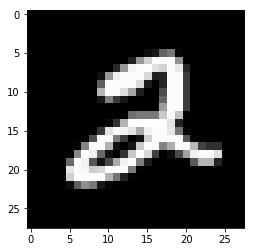

In [3]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [4]:
# If we train on the whole set we expect it to learn to detect edges.
train_loader = torch.utils.data.DataLoader(mnist_data,
                    batch_size=64, shuffle=True)

In [5]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
rbm_mnist = RBM(visible_units=28*28 , hidden_units=64 , use_gpu=False , learning_rate = 1.3e-5 , 
                weight_decay = 1.4e-4,
               _activation='sigmoid',
               momentum_coefficient = 0.5)

In [6]:
epochs = 35
batch_size = 64
rbm_mnist.train(train_loader , epochs , batch_size)

Epoch Error(epoch:0) : 888256.5000
Epoch Error(epoch:1) : 779509.4375
Epoch Error(epoch:2) : 683182.6875
Epoch Error(epoch:3) : 642544.5000
Epoch Error(epoch:4) : 624104.8125
Epoch Error(epoch:5) : 614429.9375
Epoch Error(epoch:6) : 608858.3125
Epoch Error(epoch:7) : 605362.1875
Epoch Error(epoch:8) : 603091.6875
Epoch Error(epoch:9) : 601443.2500
Epoch Error(epoch:10) : 600311.9375
Epoch Error(epoch:11) : 599407.7500
Epoch Error(epoch:12) : 598757.6875
Epoch Error(epoch:13) : 598254.8750
Epoch Error(epoch:14) : 597836.0000
Epoch Error(epoch:15) : 597537.5625
Epoch Error(epoch:16) : 597288.3125
Epoch Error(epoch:17) : 597043.6250
Epoch Error(epoch:18) : 596852.1250
Epoch Error(epoch:19) : 596697.6250
Epoch Error(epoch:20) : 596563.1250
Epoch Error(epoch:21) : 596460.1875
Epoch Error(epoch:22) : 596357.6250
Epoch Error(epoch:23) : 596261.7500
Epoch Error(epoch:24) : 596176.9375
Epoch Error(epoch:25) : 596083.1875
Epoch Error(epoch:26) : 596044.2500
Epoch Error(epoch:27) : 595963.0000
Ep

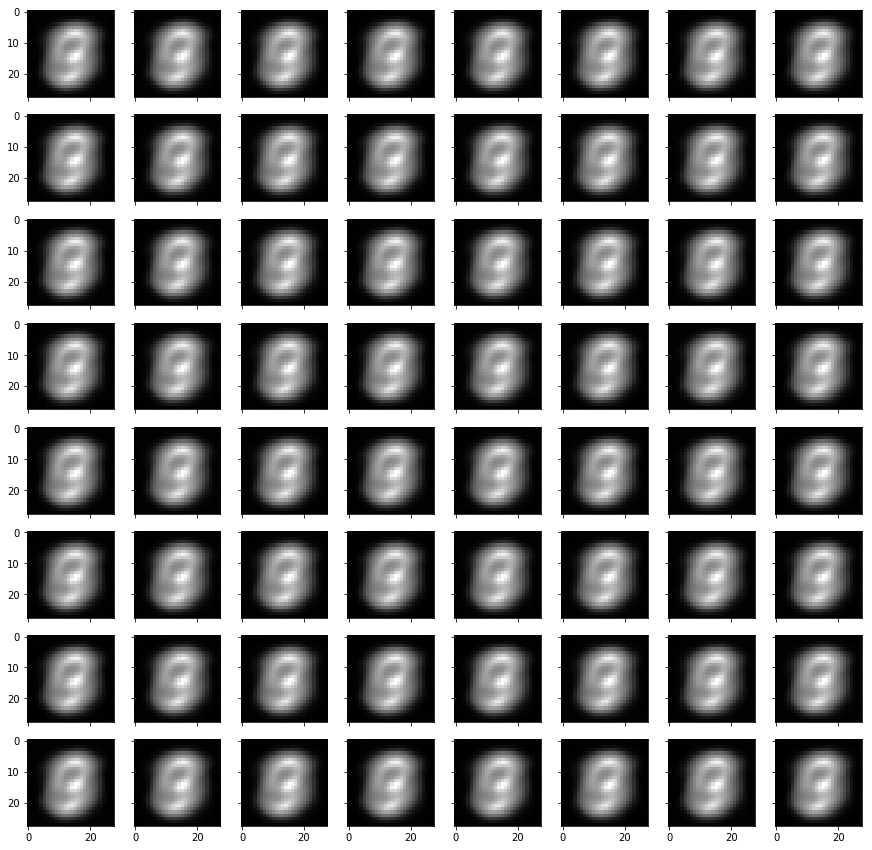

In [7]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.
f , axarr = plt.subplots(8 , 8 , True, True)
f.set_figheight(15)
f.set_figwidth(15)
learned_weights = rbm_mnist.weight.transpose(0,1).numpy()
for i in range(8):    
    for j in range(8):
        w = learned_weights[8 * i + j,:].reshape(28,28)
        
        axarr[i,j].imshow(w , cmap= 'gray')        


# plt.tight_layout()
plt.show()

In [8]:
#This is an unsupervised learning algorithm. So let us try training on one particular number.But first
# we need to seperate the data.

number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [9]:
tensor_x = torch.stack([torch.Tensor(i) for i in particular_mnist])
tensor_y = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [10]:
mnist_particular_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)
mnist_particular_dataloader = torch.utils.data.DataLoader(mnist_particular_dataset)

In [11]:
epochs = 35
batch_size = 64
rbm_mnist.train(mnist_particular_dataloader , epochs , batch_size)

Epoch Error(epoch:0) : 29804171264.0000
Epoch Error(epoch:1) : 29782016000.0000
Epoch Error(epoch:2) : 29779050496.0000
Epoch Error(epoch:3) : 29778204672.0000
Epoch Error(epoch:4) : 29777911808.0000
Epoch Error(epoch:5) : 29777817600.0000
Epoch Error(epoch:6) : 29777739776.0000
Epoch Error(epoch:7) : 29777702912.0000
Epoch Error(epoch:8) : 29777668096.0000
Epoch Error(epoch:9) : 29777643520.0000
Epoch Error(epoch:10) : 29777610752.0000
Epoch Error(epoch:11) : 29777580032.0000
Epoch Error(epoch:12) : 29777551360.0000
Epoch Error(epoch:13) : 29777539072.0000
Epoch Error(epoch:14) : 29777522688.0000
Epoch Error(epoch:15) : 29777498112.0000
Epoch Error(epoch:16) : 29777473536.0000
Epoch Error(epoch:17) : 29777457152.0000
Epoch Error(epoch:18) : 29777436672.0000
Epoch Error(epoch:19) : 29777418240.0000
Epoch Error(epoch:20) : 29777395712.0000
Epoch Error(epoch:21) : 29777369088.0000
Epoch Error(epoch:22) : 29777352704.0000
Epoch Error(epoch:23) : 29777336320.0000
Epoch Error(epoch:24) : 29

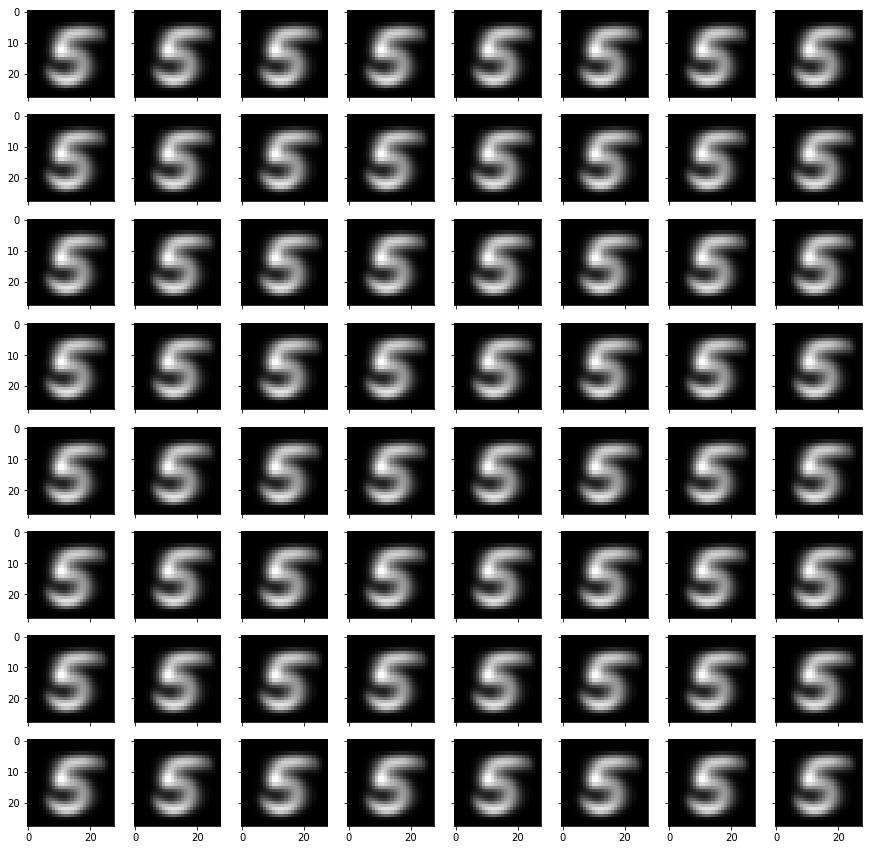

In [12]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.
f , axarr = plt.subplots(8 , 8 , True, True)
f.set_figheight(15)
f.set_figwidth(15)
learned_weights = rbm_mnist.weight.transpose(0,1).numpy()
for i in range(8):    
    for j in range(8):
        w = learned_weights[8 * i + j,:].reshape(28,28)
        
        axarr[i,j].imshow(w , cmap= 'gray')        


# plt.tight_layout()
plt.show()

The original number: 2


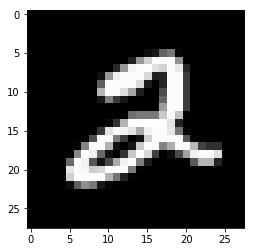

The reconstructed image


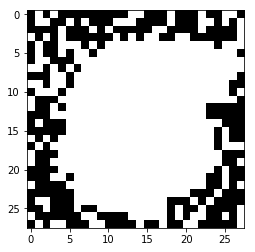

In [13]:
#Lets try reconstructing a random number from this model which has learned 5
idx = 5
img = mnist_data.train_data[idx]
reconstructed_img = img.view(-1).type(torch.FloatTensor)

_ , reconstructed_img = rbm_mnist.to_hidden(reconstructed_img)
_ , reconstructed_img = rbm_mnist.to_visible(reconstructed_img)
reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()